In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

## **Read the Dataset**

In [9]:
df = pd.read_csv('C:/Users/basha/Downloads/Advertising.csv')

In [10]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
# features and labels
# label is Sales and features are TV, Radio, Newspaper

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
# 200 row and 5 column

In [14]:
# drop "Unnamed" column

In [15]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True )

In [16]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Visualization

In [17]:
df['total'] = df['TV'] + df['Radio'] + df['Newspaper']

In [18]:
df.head()

,TV,Radio,Newspaper,Sales,total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total', ylabel='Sales'>

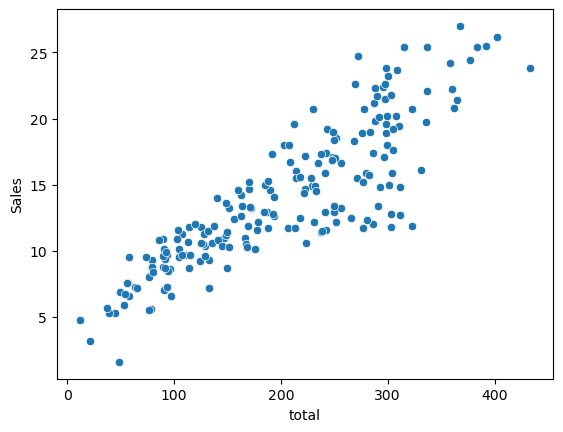

In [19]:
sns.scatterplot( x = 'total', y = 'Sales', data = df)

<Axes: xlabel='total', ylabel='Sales'>

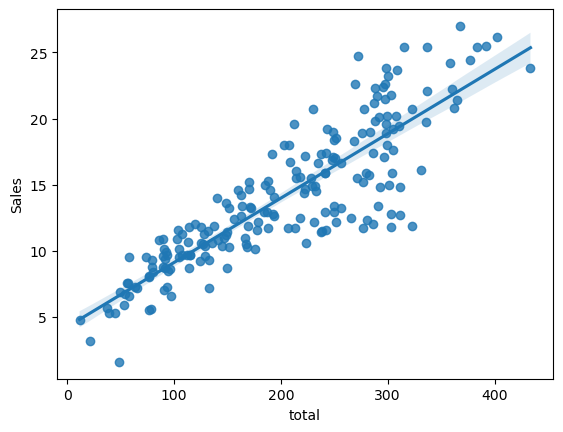

In [20]:
sns.regplot(x = 'total', y='Sales', data = df)

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


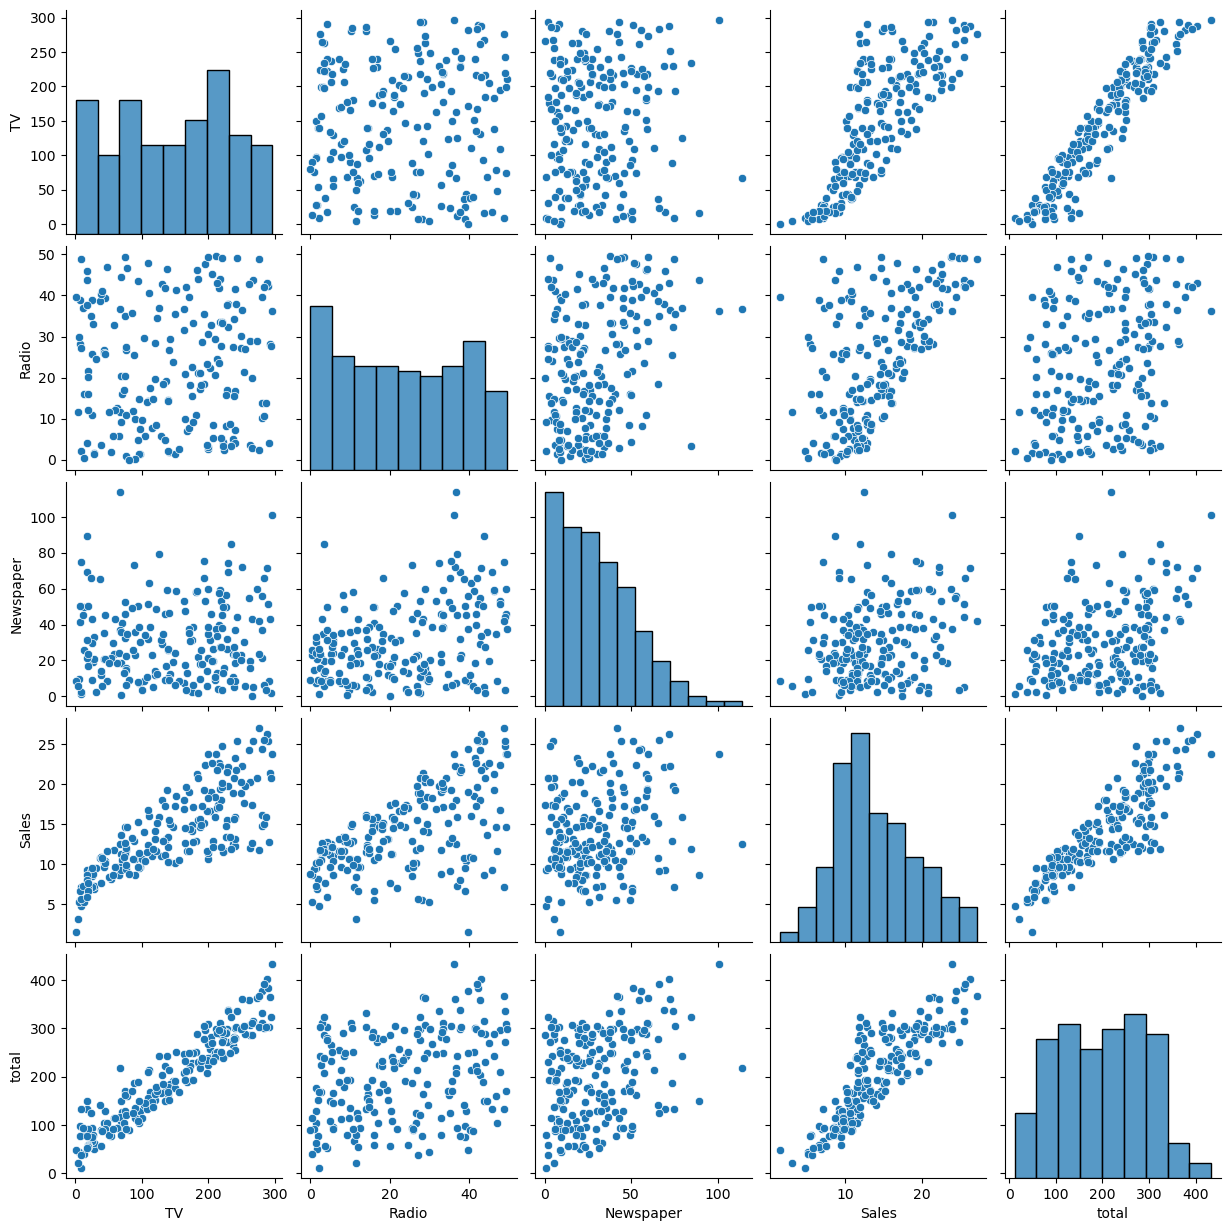

In [21]:
sns.pairplot(df)

# Data preprocessing 

In [22]:
np.max(df)

433.6

In [23]:
np.min(df)

0.0

In [24]:
# split data into features(x), lables(y)
x = df.drop(['Sales', 'total'], axis = 1)
y = df['Sales'] # label / target

In [25]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
# split data into training and testing -> train and test
# train = 80%
# test = 20%

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [28]:
x_train.head()

,TV,Radio,Newspaper
171,164.5,20.9,47.4
142,220.5,33.2,37.9
133,219.8,33.5,45.1
79,116.0,7.7,23.1
54,262.7,28.8,15.9


In [53]:
x_test.head()

,TV,Radio,Newspaper
61,261.3,42.7,54.7
105,137.9,46.4,59.0
53,182.6,46.2,58.7
10,66.1,5.8,24.2
51,100.4,9.6,3.6


In [29]:
y_train.head()

171    14.5
142    20.1
133    19.6
79     11.0
54     20.2
Name: Sales, dtype: float64

In [30]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)

x_train shape (160, 3)
y_train shape (160,)


In [31]:
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_test shape (40, 3)
y_test shape (40,)


# model building 

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
#call LinearRegression
lr_model = LinearRegression()

In [38]:
# fit / train model on train data
lr_model.fit(x_train, y_train)

LinearRegression()

In [39]:
#predict / test model using x_test data 
y_pred = lr_model.predict(x_test)

In [42]:
y_pred # predicted values

array([22.89064812, 18.02165938, 20.00222853,  7.03276332,  9.36886151,
       19.39621223, 21.59146333, 17.04291264,  9.85320203, 18.17609009,
       11.93811582, 15.15937549,  5.39469637,  7.90014782, 13.52870459,
       11.1072838 ,  9.97741298, 11.53743611, 14.1946661 , 10.52179037,
       19.81077502, 17.45898942, 12.76246026, 14.01534925, 20.84470885,
        8.4699129 ,  7.59183975, 15.21960539, 10.64500888, 11.97076479,
       18.25313607, 16.49435953,  8.72528953, 10.6701571 , 20.70956828,
       13.28266265,  8.9828774 , 15.19701637, 19.13469688, 16.60785951])

In [43]:
y_test #actual values 

61     24.2
105    19.2
53     21.2
10      8.6
51     10.7
124    19.7
42     20.7
89     16.7
73     11.0
59     18.4
134    10.8
45     14.9
195     7.6
65      9.3
122    11.6
164    11.9
90     11.2
80     11.8
160    14.4
72      8.8
139    20.7
163    18.0
197    12.8
165    11.9
84     21.7
191     9.9
32      9.6
146    13.2
130     1.6
116    12.2
150    16.1
23     15.5
143    10.4
12      9.2
52     22.6
167    12.2
78      5.3
123    15.2
92     19.4
194    17.3
Name: Sales, dtype: float64

In [44]:
# performance measure 
# 1 - absolute error
# 2 - Mean Squared error
# 3 - Root mean square error 

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
# mean absolute error
mean_absolute_error(y_test, y_pred)

1.3427082142595692

In [50]:
# mean squared error
mean_squared_error(y_test, y_pred)

3.9000481136511183

In [52]:
# Root meaen squared error
np.sqrt(mean_squared_error(y_test, y_pred))

1.9748539474227247

In [54]:
print (lr_model.predict([[261.3,42.7,54.7]]))

[22.89064812]


C:\Users\basha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
